In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [2]:
ESR = pd.read_csv('data.csv')

In [3]:
ESR

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,X22.V1.114,-22,-22,-23,-26,-36,-42,-45,-42,-45,...,15,16,12,5,-1,-18,-37,-47,-48,2
11496,X19.V1.354,-47,-11,28,77,141,211,246,240,193,...,-65,-33,-7,14,27,48,77,117,170,1
11497,X8.V1.28,14,6,-13,-16,10,26,27,-9,4,...,-65,-48,-61,-62,-67,-30,-2,-1,-8,5
11498,X10.V1.932,-40,-25,-9,-12,-2,12,7,19,22,...,121,135,148,143,116,86,68,59,55,3


In [4]:
ESR = ESR.drop(columns=ESR.columns[0]) #dropping first column
ESR

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,-22,-22,-23,-26,-36,-42,-45,-42,-45,-49,...,15,16,12,5,-1,-18,-37,-47,-48,2
11496,-47,-11,28,77,141,211,246,240,193,136,...,-65,-33,-7,14,27,48,77,117,170,1
11497,14,6,-13,-16,10,26,27,-9,4,14,...,-65,-48,-61,-62,-67,-30,-2,-1,-8,5
11498,-40,-25,-9,-12,-2,12,7,19,22,29,...,121,135,148,143,116,86,68,59,55,3


The number of trials for the non-seizure class is: 9200
The number of trials for the seizure class is: 2300


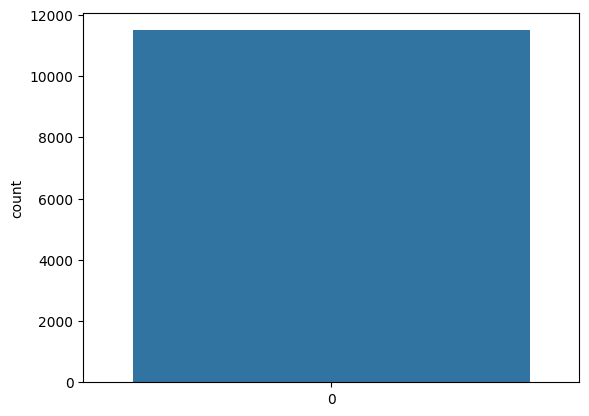

In [5]:
cols = ESR.columns
tgt = ESR.y
tgt[tgt>1] = 0
ax = sn.countplot(tgt, label="Count")
non_seizure, seizure = tgt.value_counts()
print('The number of trials for the non-seizure class is:', non_seizure)
print('The number of trials for the seizure class is:', seizure)

In [6]:
ESR.isnull().sum().sum()

0

In [7]:
ESR.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.00000,11500.000000,...,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,-11.581391,-10.911565,-10.187130,-9.143043,-8.009739,-7.003478,-6.502087,-6.68713,-6.55800,-6.168435,...,-10.145739,-11.630348,-12.943478,-13.668870,-13.363304,-13.045043,-12.705130,-12.426000,-12.195652,0.200000
std,165.626284,166.059609,163.524317,161.269041,160.998007,161.328725,161.467837,162.11912,162.03336,160.436352,...,164.652883,166.149790,168.554058,168.556486,167.257290,164.241019,162.895832,162.886311,164.852015,0.400017
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.00000,-1840.00000,-1867.000000,...,-1867.000000,-1865.000000,-1642.000000,-1723.000000,-1866.000000,-1863.000000,-1781.000000,-1727.000000,-1829.000000,0.000000
25%,-54.000000,-55.000000,-54.000000,-54.000000,-54.000000,-54.000000,-54.000000,-55.00000,-55.00000,-54.000000,...,-55.000000,-56.000000,-56.000000,-56.000000,-55.000000,-56.000000,-55.000000,-55.000000,-55.000000,0.000000
50%,-8.000000,-8.000000,-7.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.00000,-7.00000,-7.000000,...,-9.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.000000,-9.000000,-9.000000,-9.000000,0.000000
75%,34.000000,35.000000,36.000000,36.000000,35.000000,36.000000,35.000000,36.00000,36.00000,35.250000,...,34.000000,34.000000,33.000000,33.000000,34.000000,34.000000,34.000000,34.000000,34.000000,0.000000
max,1726.000000,1713.000000,1697.000000,1612.000000,1518.000000,1816.000000,2047.000000,2047.00000,2047.00000,2047.000000,...,1777.000000,1472.000000,1319.000000,1436.000000,1733.000000,1958.000000,2047.000000,2047.000000,1915.000000,1.000000


In [8]:
Y = ESR.iloc[:,178].values
Y.shape

(11500,)

In [9]:
Y[Y>1]=0
# np.unique(Y)
# np.unique(Y, return_counts=True)
Y

array([0, 1, 0, ..., 0, 0, 0])

In [10]:
X = ESR.iloc[:,1:178].values
X.shape

(11500, 177)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [12]:
X_train.shape

(9200, 177)

In [13]:
X_train

array([[ -76,  -71,  -56, ...,   35,   56,   50],
       [   2,    5,   15, ...,    9,    1,   -1],
       [  -4,  -19,  -26, ...,  -42,  -36,  -34],
       ...,
       [-223, -232, -252, ...,  -53,  -26,  -15],
       [ -25,  -26,  -30, ...,   16,   17,   17],
       [ -13,  -25,  -14, ...,   47,   21,   -2]])

In [14]:
X_test.shape

(2300, 177)

In [15]:
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
X_train

array([[-0.38527758, -0.36544309, -0.28360665, ...,  0.28930629,
         0.41489971,  0.37343868],
       [ 0.08430579,  0.09903847,  0.1552249 , ...,  0.13195413,
         0.08206854,  0.06802327],
       [ 0.04818399, -0.04763992, -0.09818486, ..., -0.17669819,
        -0.14183607, -0.12959846],
       ...,
       [-1.27026164, -1.3494106 , -1.49502896, ..., -0.24327026,
        -0.08132131, -0.01581625],
       [-0.0782423 , -0.09042111, -0.12290777, ...,  0.17431817,
         0.17889215,  0.17581695],
       [-0.00599871, -0.08430951, -0.02401615, ...,  0.36193036,
         0.20309805,  0.06203474]])

In [17]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train,y_train)
y_pred_svc = clf.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred_svc))

0.971304347826087


In [19]:
y_pred_svc

array([0, 0, 0, ..., 1, 0, 0])

save and load


In [20]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(clf, open(filename, 'wb'))

In [21]:
loaded_model = pickle.load(open(filename, 'rb'))
print(accuracy_score(y_test,loaded_model.predict(X_test)))

0.971304347826087


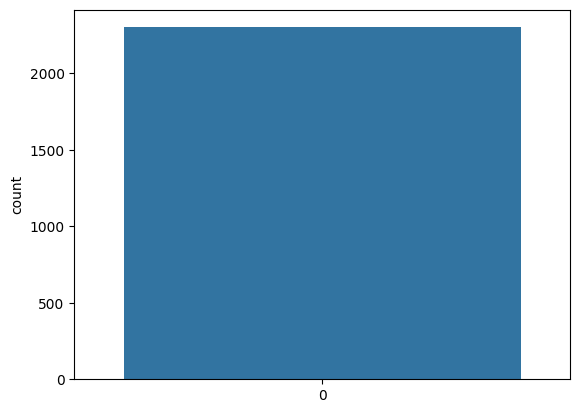

In [19]:
a1= sn.countplot(y_pred_svc)

In [20]:
acc_svc = round(accuracy_score(y_test,y_pred_svc)*100,2)
print("Accuracy for SVC is : ",acc_svc)

Accuracy for SVC is :  97.48


In [21]:
new_input1 = [ESR.iloc[1,:177]]
new_input1

[X1      386
 X2      382
 X3      356
 X4      331
 X5      320
        ... 
 X173    152
 X174    157
 X175    156
 X176    154
 X177    143
 Name: 1, Length: 177, dtype: int64]

In [22]:
new_output = clf.predict(new_input1)
new_output

array([1], dtype=int64)

In [23]:
if new_output==[1]:
    print("Yes, you have chance to get epilepcy")
else:
    print("No, you have no chance to get epilepcy")

Yes, you have chance to get epilepcy


In [24]:
new_input2 = [ESR.iloc[2,:177]]
new_input2

[X1     -32
 X2     -39
 X3     -47
 X4     -37
 X5     -32
         ..
 X173    19
 X174   -12
 X175   -30
 X176   -35
 X177   -35
 Name: 2, Length: 177, dtype: int64]

In [25]:
new_output1 = clf.predict(new_input2)
new_output1

array([1], dtype=int64)

In [26]:
if new_output1==[1]:
    print("Yes, you have chance to get epilepcy")
else:
    print("No, you have no chance to get epilepcy")

Yes, you have chance to get epilepcy


In [27]:
new_input3 = [ESR.iloc[115, :177]]

In [28]:
new_output3 = clf.predict(new_input3)
new_output3

array([1], dtype=int64)

In [29]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='entropy', random_state=1)
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)
# acc_dtc = round(dtc.score(X_train,y_train)*100,2)
# print("Accuracy for Decison Tree is : ",acc_dtc)
acc_dtc = round(accuracy_score(y_test, y_pred_dtc)*100,2)
print("Accuracy for Decison Tree is : ",acc_dtc)

Accuracy for Decison Tree is :  94.26


In [30]:
np.unique(y_pred_dtc)

array([0, 1], dtype=int64)

In [31]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
# acc_rfc = round(rfc.score(X_train,y_train)*100,2)
# print("Accuracy for Random Forest Tree is : ",acc_rfc)
acc_rfc = round(accuracy_score(y_test,y_pred_rfc)*100,2)
print("Accuracy for Random Forest is : ", acc_rfc)

Accuracy for Random Forest is :  97.48


In [33]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
y_pred_gbc = gbc.predict(X_test)
acc_gbc = round(accuracy_score(y_test,y_pred_gbc)*100,2)
print("Accuracy for Gradient Boosting classifier: ",acc_gbc)
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# model = GradientBoostingClassifier()


Accuracy for Gradient Boosting classifier:  96.65


In [63]:
from sklearn.ensemble import HistGradientBoostingClassifier
hgb_classifier = HistGradientBoostingClassifier(max_iter=100)
hgb_classifier.fit(X_train,y_train)
y_pred_hgb = hgb_classifier.predict(X_test)
acc_hgb = round(accuracy_score(y_test,y_pred_hgb)*100,2)
print("Accuracy for Hist Gradient Boosting Classifier is : ", acc_hgb)

Accuracy for Hist Gradient Boosting Classifier is :  97.7


In [38]:
from sklearn.pipeline import make_pipeline
# Pipeline Estimator
pipeline = make_pipeline(StandardScaler(),
                        DecisionTreeClassifier(random_state=1))
# Fit the model
pipeline.fit(X_train, y_train)
# Model scores on test and training data
print('Model test Score: %.3f, ' %pipeline.score(X_test, y_test),
      'Model training Score: %.3f' %pipeline.score(X_train, y_train))

Model test Score: 0.940,  Model training Score: 1.000


In [41]:
from sklearn.ensemble import BaggingClassifier
bgclassifier = BaggingClassifier(base_estimator=pipeline, n_estimators=100,
                                 max_features=10,
                                 max_samples=100,
                                 random_state=1, n_jobs=5)

# Fit the bagging classifier

bgclassifier.fit(X_train, y_train)
y_pred_bgc = bgclassifier.predict(X_test)
acc_bgc = round(accuracy_score(y_test,y_pred_bgc)*100,2)
print("Accuracy for bagging classifier is : ", acc_bgc)

# Model scores on test and training data

# print('Model test Score: %.3f, ' %bgclassifier.score(X_test, y_test),
#       'Model training Score: %.3f' %bgclassifier.score(X_train, y_train))

Accuracy for bagging classifier is :  94.87


In [64]:
from sklearn.ensemble import AdaBoostClassifier
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model_adc = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_adc = model_adc.predict(X_test)
acc_adc = round(accuracy_score(y_test,y_pred_adc)*100,2)
print("Accuracy for AdaBoost classifier is : ", acc_adc)

Accuracy for AdaBoost classifier is :  94.48


In [59]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
# model1 = LogisticRegression(random_state=1)
model1 = KNeighborsClassifier(n_neighbors=4)
model2 = DecisionTreeClassifier(random_state=1)
model_vote = VotingClassifier(estimators=[('knn', model1), ('dt', model2)], voting='soft')
model_vote.fit(X_train,y_train)
y_pred_vote = model_vote.predict(X_test)
acc_vote = round(accuracy_score(y_test,y_pred_vote)*100, 2)
print("Accuracy for voting classifier: ", acc_vote)

Accuracy for voting classifier:  94.78
